### Задание 9.1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).

Произвести расчет как с использованием intercept, так и без.

### Решение с нтерсептом

In [70]:
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = len(ks)
b1 = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b1

2.620538882402765

In [71]:
b0 = np.mean(ks)-b1*np.mean(zp)
b0

444.1773573243596

In [72]:
y_pred = b0 + b1 * zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

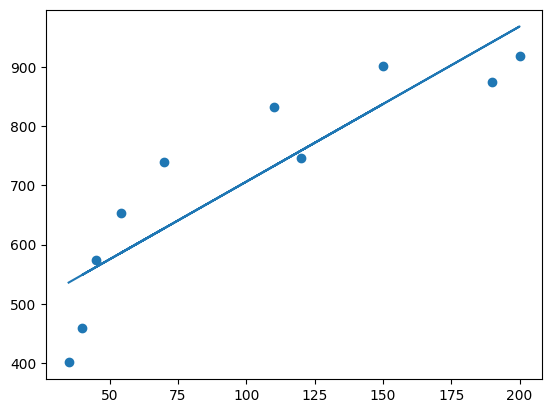

In [73]:
import matplotlib.pyplot as plt
plt.scatter(zp, ks)
plt.plot(zp, y_pred)

In [74]:
mse_ = np.sum(((b0 + b1 * zp) - ks) ** 2 / n)
mse_

6470.414201176659

In [75]:
mse_ = ((ks - y_pred)**2).sum() / n
mse_

6470.414201176658

### Решение без интерсепта

In [76]:
zp1 = zp.reshape(1, n)
ks1 = ks.reshape(1, n)

In [77]:
b1 = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
b1

5.889820420132689

In [78]:
y_pred1 = b1 * zp
y_pred1

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

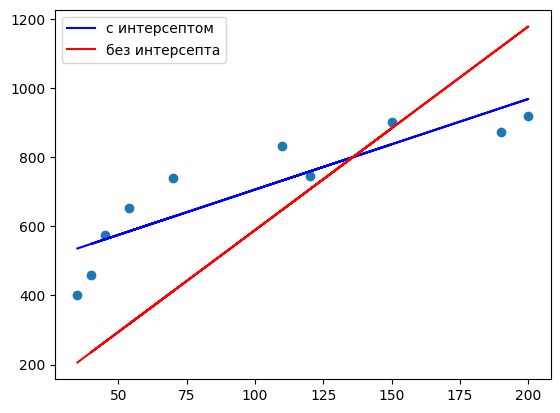

In [79]:
import matplotlib.pyplot as plt
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b', label = 'с интерсептом')
plt.plot(zp, y_pred1, 'r', label = 'без интерсепта')
plt.legend()

### Задание 9.2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [80]:
alpha = 1e-6
b1 = 0.1
def mse_(b1, y=ks, X=zp, n=10):
    return np.sum((b1 * X - y) ** 2) / n

for i in range(3001):
    fp = (1 / n) * np.sum(2 * (b1 * zp - ks) * zp)
    b1 -= alpha * fp
    if i % 500 == 0:
        print(f'Итерация: {i}, b1 : {b1}, mse: {mse_(b1) }')

Итерация: 0, b1 : 0.25952808000000005, mse: 493237.7212546963
Итерация: 500, b1 : 5.889815595583751, mse: 56516.858416040064
Итерация: 1000, b1 : 5.8898204201285544, mse: 56516.85841571941
Итерация: 1500, b1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 2000, b1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 2500, b1 : 5.889820420132673, mse: 56516.85841571943
Итерация: 3000, b1 : 5.889820420132673, mse: 56516.85841571943


In [81]:
y_pred1 = b1 * zp
y_pred1

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

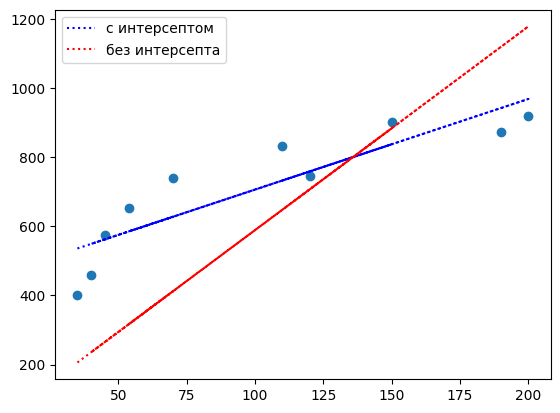

In [82]:
import matplotlib.pyplot as plt
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b:', label = 'с интерсептом')
plt.plot(zp, y_pred1, 'r:', label = 'без интерсепта')
plt.legend()

### Задание 9.3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).